# Loading data from the datacube

This notebook will briefly discuss how to load data from the datacube.

**Requirements:**
* A running data cube created via 01 - Getting Started

In [1]:
# This next line enables interactive plots for use later in the notebook
%matplotlib notebook

## Importing the datacube module

To start with, we'll import the datacube module and load an instance of the datacube and call our application name *load-data-example*. The application name can be anything, its used in logging information so you can trace results etc using the name.
We'll keep this example satisfying in that you can see some data quickly. Later as we look at more specific products and analysis we'll introduce more variants of the loading process.

In [2]:
import datacube
dc = datacube.Datacube(app='load-data-example')

/home/jovyan/.local/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## Loading data

Loading data from the datacube uses the *load* function.

The function takes several arguments:

* *product*; A specifc product to load
* *x*; Defines the spatial region in the *x* dimension (normally longitude)
* *y*; Defines the spatial region in the *y* dimension (normally latitude)
* *time*; Defines the temporal extent.

We'll load the Landsat 8 USGS Surface Reflectance, for the spatial region covering:

* 149.05 -> 149.17 degrees longitude
* -35.25 -> -35.35 degrees latitude

and a temporal extent covering:

* 2017-09-01 -> 2017-09-15

There is more data available in the CDC Lte training dataset but we're just keeping it small for convenience.
Note if you select a large amount of data the datacube will attempt to load it into memory and you may run out of memory depending on your PC setup. We'll discuss how to deal with this and scaling up calculations in general later in the course.

In [3]:
data = dc.load(product='ls8_usgs_sr_scene', 
               x=(149.05, 149.17), y=(-35.25, -35.35),
               time=('2017-09-01', '2017-09-15'), output_crs='epsg:3577',resolution=(-30,30))

Now lets see what was loaded

In [4]:
data


<xarray.Dataset>
Dimensions:          (time: 4, x: 410, y: 417)
Coordinates:
  * time             (time) datetime64[ns] 2017-09-04T23:50:24.564670 ...
  * y                (y) float64 -3.953e+06 -3.953e+06 -3.953e+06 -3.953e+06 ...
  * x                (x) float64 1.542e+06 1.542e+06 1.542e+06 1.542e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 187 89 69 257 271 431 237 212 215 ...
    blue             (time, y, x) int16 233 277 382 518 447 489 285 321 328 ...
    green            (time, y, x) int16 481 567 689 806 726 785 513 630 523 ...
    red              (time, y, x) int16 580 548 751 1063 923 809 591 650 604 ...
    nir              (time, y, x) int16 2115 2291 2447 2283 2250 2511 1983 ...
    swir1            (time, y, x) int16 1357 1516 1891 1768 1467 2189 1472 ...
    swir2            (time, y, x) int16 956 1010 1317 1277 1077 1607 1076 ...
    pixel_qa         (time, y, x) uint16 322 322 322 322 322 322 322 322 322 ...
    sr_aerosol       (time, y, x) uint8

Alternately you can use the following syntax which you may more useful as you can carry the parameters around in a data structure rather than an API call:
___Play tip:___ _The cell below has the dc.load command commented out so accidentally running it won't reload the data unnecessarily. You can uncomment the last two lines and run the cell if you want to verify it is exactly the same as above._

In [5]:
# Define temporal and spatial extents to pass to `dc.load` for the data extraction:
query = {'lat': (-35.25, -35.35),
         'lon': (149.05, 149.17),
         'time':('2017-09-01', '2017-09-15'),
         'output_crs': 'PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",147],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32655"]]',
         'resolution': (-30,30)}
# Load data for the specified query extent using `dc.load`:
data = dc.load(product='ls8_usgs_sr_scene', **query, group_by='solar_day')
data

<xarray.Dataset>
Dimensions:          (time: 2, x: 373, y: 379)
Coordinates:
  * time             (time) datetime64[ns] 2017-09-04T23:50:24.564670 ...
  * y                (y) float64 -3.903e+06 -3.903e+06 -3.903e+06 -3.903e+06 ...
  * x                (x) float64 6.863e+05 6.863e+05 6.863e+05 6.864e+05 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 348 284 310 497 592 601 613 543 390 ...
    blue             (time, y, x) int16 357 308 405 642 763 693 701 550 346 ...
    green            (time, y, x) int16 702 704 737 980 1025 959 816 786 419 ...
    red              (time, y, x) int16 529 495 690 1198 1236 1121 933 835 ...
    nir              (time, y, x) int16 5038 4843 4343 2981 2959 2655 2311 ...
    swir1            (time, y, x) int16 2182 1934 2251 3352 3318 2472 2004 ...
    swir2            (time, y, x) int16 1076 940 1188 2120 2190 1817 1466 ...
    pixel_qa         (time, y, x) uint16 322 322 322 322 322 322 328 328 328 ...
    sr_aerosol       (time, y, x) uint

## Load specific measurements of a given product

Some products have several *measurements* such as Landsat 8. Let's use the code from 02 - List Products to find out what *measurements* are available for the *ls8_usgs_scene* product:



In [6]:
# Get the measurements
measurements = dc.list_measurements()
display_columns = ['units', 'nodata', 'aliases']
measurements[display_columns].loc['ls8_usgs_sr_scene']

,units,nodata,aliases
measurement,,,
coastal_aerosol,reflectance,-9999,"[band_1, sr_band1]"
blue,reflectance,-9999,"[band_2, sr_band2]"
green,reflectance,-9999,"[band_3, sr_band3]"
red,reflectance,-9999,"[band_4, sr_band4]"
nir,reflectance,-9999,"[band_5, sr_band5]"
swir1,reflectance,-9999,"[band_6, sr_band6]"
swir2,reflectance,-9999,"[band_7, sr_band7]"
pixel_qa,bit_index,1,[pixel_qa]
sr_aerosol,bit_index,0,"[sr_aerosol_qa, aerosol_qa, aerosol]"


Now let's modify our `dc.load` call to only load the *red* and *nir* measurements.

In [7]:
# Define temporal and spatial extents to pass to `dc.load` for the data extraction:
query = {'lat': (-35.25, -35.35),
         'lon': (149.05, 149.17),
         'time':('2017-09-01', '2017-09-15'),
         'output_crs': 'PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",147],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32655"]]',
         'resolution': (-30,30)}
# Load data for the specified query extent using `dc.load`:
data = dc.load(product='ls8_usgs_sr_scene', **query, measurements=['red', 'nir'], group_by='solar_day')

In [8]:
data

<xarray.Dataset>
Dimensions:  (time: 2, x: 373, y: 379)
Coordinates:
  * time     (time) datetime64[ns] 2017-09-04T23:50:24.564670 ...
  * y        (y) float64 -3.903e+06 -3.903e+06 -3.903e+06 -3.903e+06 ...
  * x        (x) float64 6.863e+05 6.863e+05 6.863e+05 6.864e+05 6.864e+05 ...
Data variables:
    red      (time, y, x) int16 529 495 690 1198 1236 1121 933 835 339 211 ...
    nir      (time, y, x) int16 5038 4843 4343 2981 2959 2655 2311 2079 1067 ...
Attributes:
    crs:      PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984"...

In the next example we load the same measurements but use the `alias` name instead, both work. You will notice that the `Data Variables` created have the same value but use the `alias` names now.

In [9]:
data = dc.load(product='ls8_usgs_sr_scene', **query, measurements=['band_4', 'sr_band5'], group_by='solar_day')
data

<xarray.Dataset>
Dimensions:   (time: 2, x: 373, y: 379)
Coordinates:
  * time      (time) datetime64[ns] 2017-09-04T23:50:24.564670 ...
  * y         (y) float64 -3.903e+06 -3.903e+06 -3.903e+06 -3.903e+06 ...
  * x         (x) float64 6.863e+05 6.863e+05 6.863e+05 6.864e+05 6.864e+05 ...
Data variables:
    band_4    (time, y, x) int16 529 495 690 1198 1236 1121 933 835 339 211 ...
    sr_band5  (time, y, x) int16 5038 4843 4343 2981 2959 2655 2311 2079 ...
Attributes:
    crs:      PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984"...

One more example. Your probably sick of staring at raw numbers by now so lets load up the `red, green` and `blue` bands and draw a picture. We're going to skip a few explanations and save them for later. The image is interactive and you can pan and zoom using the small toolbar that will appear in the lower left. This was enabled at the start of the notebook with the very first cell via `%matplotlib notebook`

In [10]:
# Load up the 3 bands required
data = dc.load(product='ls8_usgs_sr_scene', **query, measurements=['red', 'green', 'blue'], group_by='solar_day')
data

<xarray.Dataset>
Dimensions:  (time: 2, x: 373, y: 379)
Coordinates:
  * time     (time) datetime64[ns] 2017-09-04T23:50:24.564670 ...
  * y        (y) float64 -3.903e+06 -3.903e+06 -3.903e+06 -3.903e+06 ...
  * x        (x) float64 6.863e+05 6.863e+05 6.863e+05 6.864e+05 6.864e+05 ...
Data variables:
    red      (time, y, x) int16 529 495 690 1198 1236 1121 933 835 339 211 ...
    green    (time, y, x) int16 702 704 737 980 1025 959 816 786 419 247 198 ...
    blue     (time, y, x) int16 357 308 405 642 763 693 701 550 346 282 258 ...
Attributes:
    crs:      PROJCS["WGS 84 / UTM zone 55N",GEOGCS["WGS 84",DATUM["WGS_1984"...

<IPython.core.display.Javascript object>


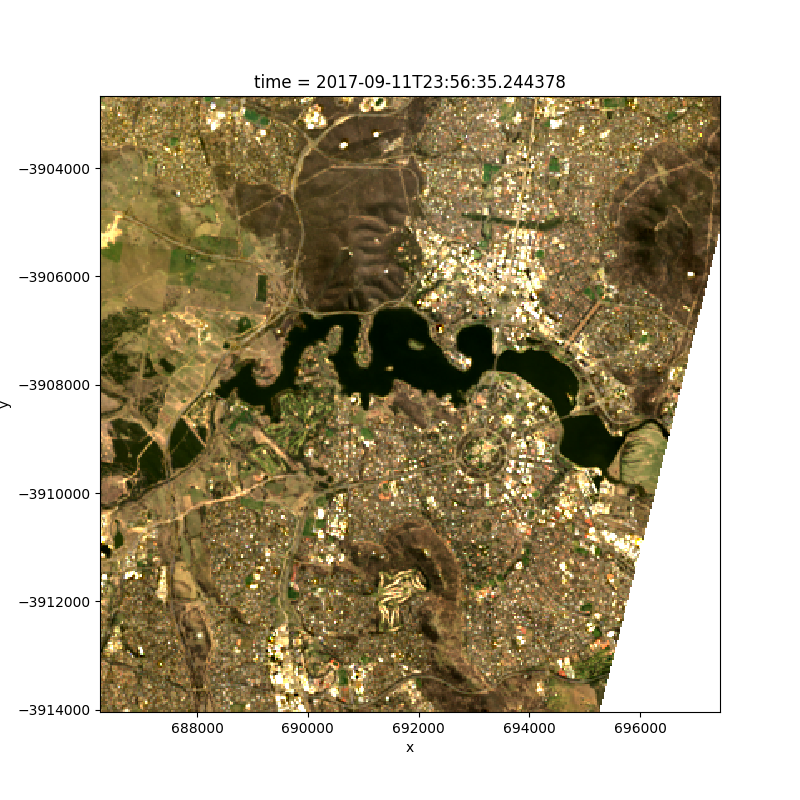

In [11]:
from datacube.storage import masking

# Set all nodata pixels to `NaN`:
data = masking.mask_invalid_data(data)
# Set all invalid data to `NaN` - valid range for USRS SR is 0 to 10000, but the surface reflectance product can have values just outside this range
# We remove them so the image drawn isn't impacted by them
data = data.where((data >= 0) & (data<=10000))

# Select a time slice from the EO data and combine the bands into a 3 band array
image_array = data[['red', 'green', 'blue']].isel(time=1).to_array()
# Show the image
image_array.plot.imshow(robust=True, figsize=(8, 8))


More information on the load function see the API docs: :py:meth:`~datacube.Datacube.load`

# Show/Hide error information
Yep, here is it again in case you need it

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_error').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.output_error').show();
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<form action="javascript:code_toggle_err()"><input type="submit" value="Click here to toggle on/off the error output."></form>''')
